<a href="https://colab.research.google.com/github/dgbarcena/07_Redes_Neuronales/blob/main/Proyecto_DavidGonz%C3%A1lez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación**

## **Estrategia 2: Red pre-entrenada**

### **1. Carga y acondicionamiento del conjunto de datos**
Dataset: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset

#### *1.1. Descarga del dataset desde la plataforma kaggle*

In [2]:
#Cargamos el fichero de autenticación de kaggle
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
#Descargamos el dataset
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

 97% 519M/534M [00:04<00:00, 144MB/s]
100% 534M/534M [00:04<00:00, 121MB/s]


In [4]:
#Descomprimimos el dataset
!unzip vegetable-image-dataset.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetabl

#### *1.2 Carga del dataset y acondicionamiento de datos*
1. Utilizamos el generador para mayor eficiencia en la carga de datos
2. Utilizamos el parametro class_mode='categorical' para realizar One-hot encoding
3. Con el parámetro rescale=1./255 normalizamos para disminuir el coste computacional


In [103]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import imagenet_utils


# Definir los directorios de los conjuntos de datos
train_dir = 'Vegetable Images/train'
test_dir = 'Vegetable Images/test'
val_dir = 'Vegetable Images/validation'

# Definir el tamaño de imagen que se utilizará para el modelo
img_size = (75,75)

# Definir el generador de datos para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.inception_v3.preprocess_input)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=64,
        class_mode='categorical')

# Definir el generador de datos para el conjunto de prueba
test_datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.inception_v3.preprocess_input)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=64,
        class_mode='categorical')

# Definir el generador de datos para el conjunto de validación
val_datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.inception_v3.preprocess_input)
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=img_size,
        batch_size=64,
        class_mode='categorical')

# Obtener los datos y las etiquetas de los generadores de datos
x_train, y_train = test_generator.next()
x_test, y_test = test_generator.next()
x_val, y_val = val_generator.next()



Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [104]:
print(train_generator.samples)
print(x_train.shape)
print(x_train[0])

15000
(64, 75, 75, 3)
[[[-0.4823529  -0.41176468 -0.29411763]
  [-0.38823527 -0.3333333  -0.19215685]
  [-0.4588235  -0.40392154 -0.26274508]
  ...
  [-0.78039217 -0.8117647  -0.90588236]
  [-0.7176471  -0.7490196  -0.9764706 ]
  [-0.5686275  -0.5686275  -0.8666667 ]]

 [[-0.4823529  -0.41960782 -0.27058822]
  [-0.5058824  -0.44313723 -0.27843136]
  [-0.4352941  -0.372549   -0.19215685]
  ...
  [-0.8745098  -0.8901961  -0.88235295]
  [-0.8117647  -0.8509804  -0.8980392 ]
  [-0.73333335 -0.7647059  -0.8352941 ]]

 [[-0.5137255  -0.372549   -0.21568626]
  [-0.32549018 -0.19999999 -0.01960784]
  [-0.44313723 -0.30196077 -0.11372548]
  ...
  [-1.         -1.         -0.96862745]
  [-0.9764706  -1.         -1.        ]
  [-0.96862745 -0.99215686 -1.        ]]

 ...

 [[ 0.0196079   0.3176471  -0.81960785]
  [ 0.26274514  0.54509807 -0.52156866]
  [ 0.11372554  0.38823533 -0.6156863 ]
  ...
  [-0.77254903 -0.41176468 -1.        ]
  [-0.6862745  -0.30196077 -0.9372549 ]
  [-0.69411767 -0.2705

### **2. Inspección del conjunto de datos**

Found 15000 images belonging to 15 classes.


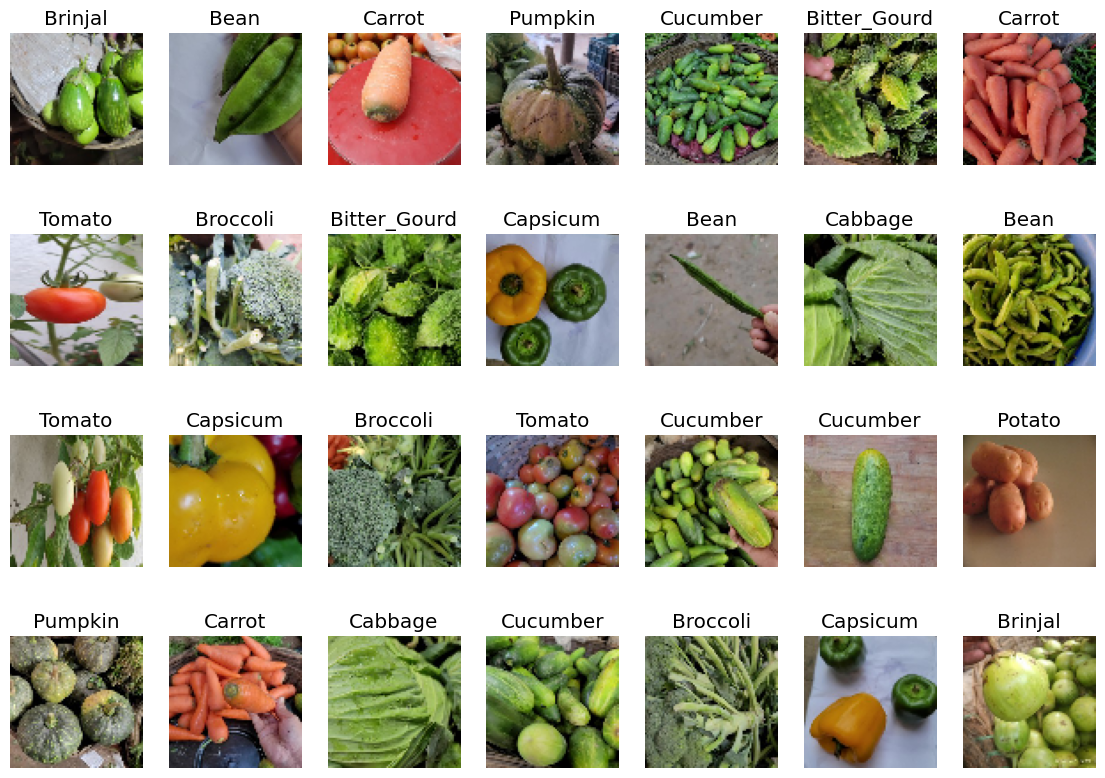

In [84]:
import matplotlib.pyplot as plt

# Definir el generador de datos para el conjunto de entrenamiento
visual_datagen = ImageDataGenerator(rescale=1./255)
visual_generator = visual_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=64,
        class_mode='categorical')

x_visual, y_visual = visual_generator.next()

# Obtener la lista de nombres de las clases
class_names = list(visual_generator.class_indices.keys())

fig = plt.figure(figsize=(14,10))
for n in range(1, 29):
    fig.add_subplot(4, 7, n)
    img = x_visual[n]
    plt.imshow(img)
    plt.axis('off')
    # Agregar el título de la clase correspondiente
    label_index = y_visual[n].argmax()
    plt.title(class_names[label_index])
plt.show()


### **3. Desarrollo de la arquitectura de red neuronal y entrenamiento de la solución**

In [97]:
from tensorflow.keras.applications import InceptionV3, ResNet50

base_model = InceptionV3(include_top=False,
    weights="imagenet",
    pooling='avg',
    input_shape=(75,75,3))

base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_660 (Conv2D)            (None, 37, 37, 32)   864         ['input_10[0][0]']               
                                                                                                  
 batch_normalization_688 (Batch  (None, 37, 37, 32)  96          ['conv2d_660[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_658 (Activation)    (None, 37, 37, 32)   0           ['batch_normalization_

In [105]:
# conectarlo a nueva parte densa
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16, imagenet_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras import Model
from tensorflow.keras import regularizers
import numpy as np

base_model.trainable = False # Evitar que los pesos se modifiquen en la parte convolucional -> TRANSFER LEARNING

# Cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output 

x = Flatten()(last) 
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01), name='fc1')(x) 
x = BatchNormalization()(x) 
# x = Dropout(0.25)(x) 
x = Dense(15, activation='softmax', name='predictions')(x) 
model = Model(base_model.input, x) 

In [106]:
# Compilamos el modelo
model.compile(optimizer=optimizers.SGD(0.0001), loss='categorical_crossentropy', metrics=['accuracy']) 

# Vamos a visualizar el modelo prestando especial atención en el número de pesos total y el número de pesos entrenables.
model.summary() 

# Entrenamos el modelo 
H = model.fit(train_generator, validation_data = val_generator, steps_per_epoch = int(train_generator.samples / 64), epochs=5) 

# # Evaluación del modelo
# print("[INFO]: Evaluando el modelo...")
# predictions = model.predict(, batch_size=64) 
# # Obtener el report de clasificación
# print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)) 

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 5), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 5), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 5), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 5), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

Model: "model_31"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_660 (Conv2D)            (None, 37, 37, 32)   864         ['input_10[0][0]']               
                                                                                                  
 batch_normalization_688 (Batch  (None, 37, 37, 32)  96          ['conv2d_660[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_658 (Activation)    (None, 37, 37, 32)   0           ['batch_normalization_688[

KeyboardInterrupt: ignored

In [36]:
256*51200 +256

13107456

### **4. Monitorización del proceso de entrenamiento para la toma de decisiones**

### **5. Evaluación del modelo predictivo y planteamiento de la siguiente prueba experimental**